In [1]:
from qiskit import *
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ
import matplotlib as mpl
import pylatexenc


# Logic Gates

In [17]:
IBMQ.enable_account("83eab2c789e4b9b5030af0f6cdcf31f3efe4f59d505bff881e43504814b25b12526b1aa8c2b5826af475da8c49d3ca4f99189e59287d8040cb3750b728aa6b76")
provider = IBMQ.get_provider(hub="ibm-q")

/Users/angelobenoit/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  """Entry point for launching an IPython kernel.
/Users/angelobenoit/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  """Entry point for launching an

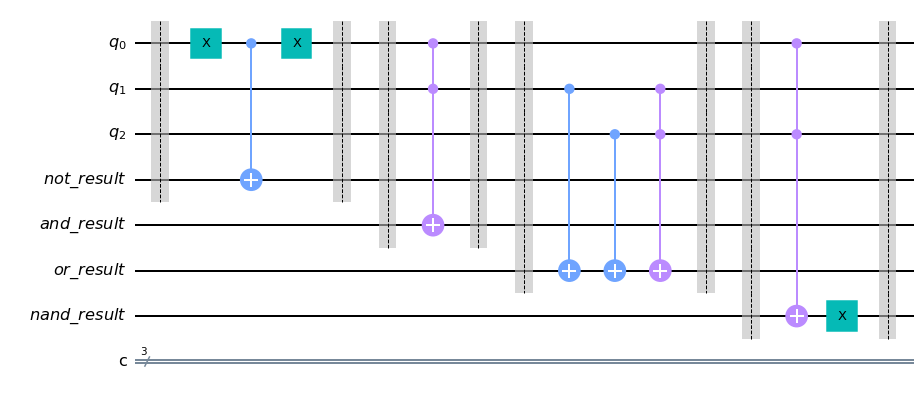

In [19]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')
qc1 = QuantumCircuit(q,c)

#---------------------------------------------------------

def and_qbit(qc, bit1, bit2, output):
    qc.add_register(output)
    qc.barrier()
    qc.ccx(bit1, bit2, output)
    # qc.measure(output, 0)
    qc.barrier()
    return output


def or_qbit(qc, bit1, bit2, output):
    qc.add_register(output)
    qc.barrier()
    qc.cx(bit1, output)
    qc.cx(bit2, output)
    qc.ccx(bit1, bit2, output)
    # qc.measure(output, 0)
    qc.barrier()
    return output

def not_qbit(qc, bit, output):
    qc.add_register(output)
    qc.barrier()
    qc.x(bit)
    qc.cx(bit, output)
    qc.x(bit)
    # qc.measure(output, 0)
    qc.barrier()
    return output

def nand_qbit(qc, bit1, bit2, output):
    qc.add_register(output)
    qc.barrier()
    qc.ccx(bit1, bit2, output)
    qc.x(output)
    # qc.measure(output, 0)
    qc.barrier()
    return output


temp_not = QuantumRegister(1, 'not_result')
not_qbit(qc1, q[0], temp_not)
#-------------------------------------------
temp_and = QuantumRegister(1, 'and_result')
and_qbit(qc1, q[0], q[1], temp_and)
#-------------------------------------------
temp_or = QuantumRegister(1, 'or_result')
or_qbit(qc1, q[1], q[2], temp_or)
#-------------------------------------------
temp_nand = QuantumRegister(1, 'nand_result')
nand_qbit(qc1, q[0], q[2], temp_nand)
#-------------------------------------------
display(qc1.draw('mpl'))

Trying the adder circuit from the S = a + b + c

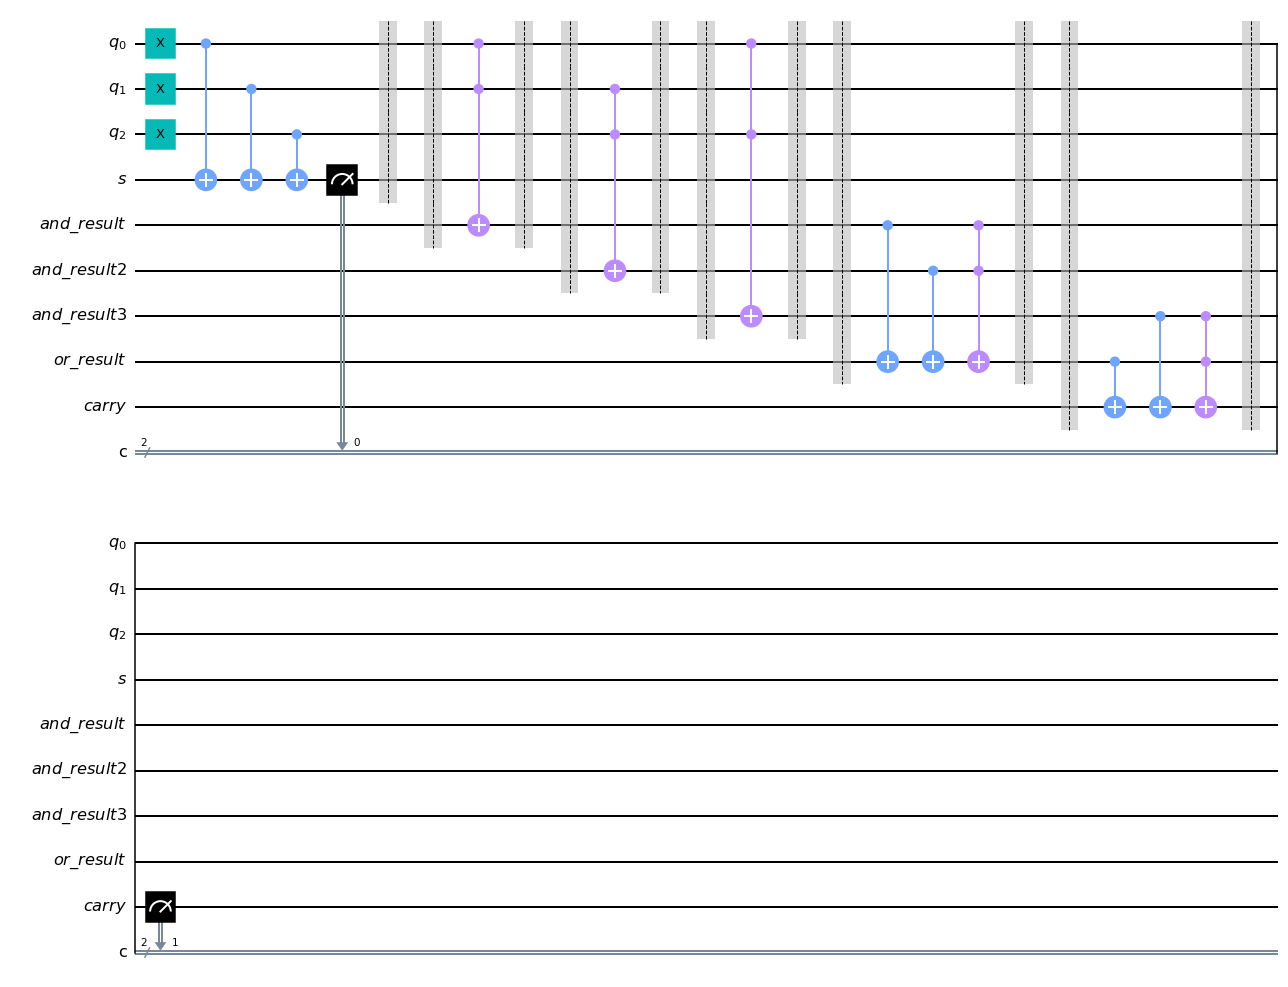

In [28]:
q4 = QuantumRegister(3,'q')
c4 = ClassicalRegister(2,'c')
qc4 = QuantumCircuit(q4,c4)

qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])

#calculate S
temp_sum = QuantumRegister(1, "s")
qc4.add_register(temp_sum)
qc4.cx(q4[0], temp_sum)
qc4.cx(q4[1], temp_sum)
qc4.cx(q4[2], temp_sum)
qc4.measure(temp_sum, 0)

qc4.barrier()
#calculate C (1 if 2+ arguments of a,b,c are 1)
temp_and = QuantumRegister(1, 'and_result')
and_qbit(qc4, q[0], q[1], temp_and)

temp_and2 = QuantumRegister(1, 'and_result2')
and_qbit(qc4, q[1], q[2], temp_and2)

temp_and3 = QuantumRegister(1, 'and_result3')
and_qbit(qc4, q[0], q[2], temp_and3)

temp_or = QuantumRegister(1, 'or_result')
or_qbit(qc4, temp_and, temp_and2, temp_or)

temp_or2 = QuantumRegister(1, 'carry')
or_qbit(qc4, temp_or, temp_and3, temp_or2)

qc4.measure(temp_or2, 1)

display(qc4.draw('mpl'))



In [26]:
backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc4, backend, shots=1)
result = job.result()
counts = result.get_counts(qc4)
print("RESULT: ",counts,"\n")

RESULT:  {'11': 1} 



# Recursive application of logic gates

Recursive not gate calls

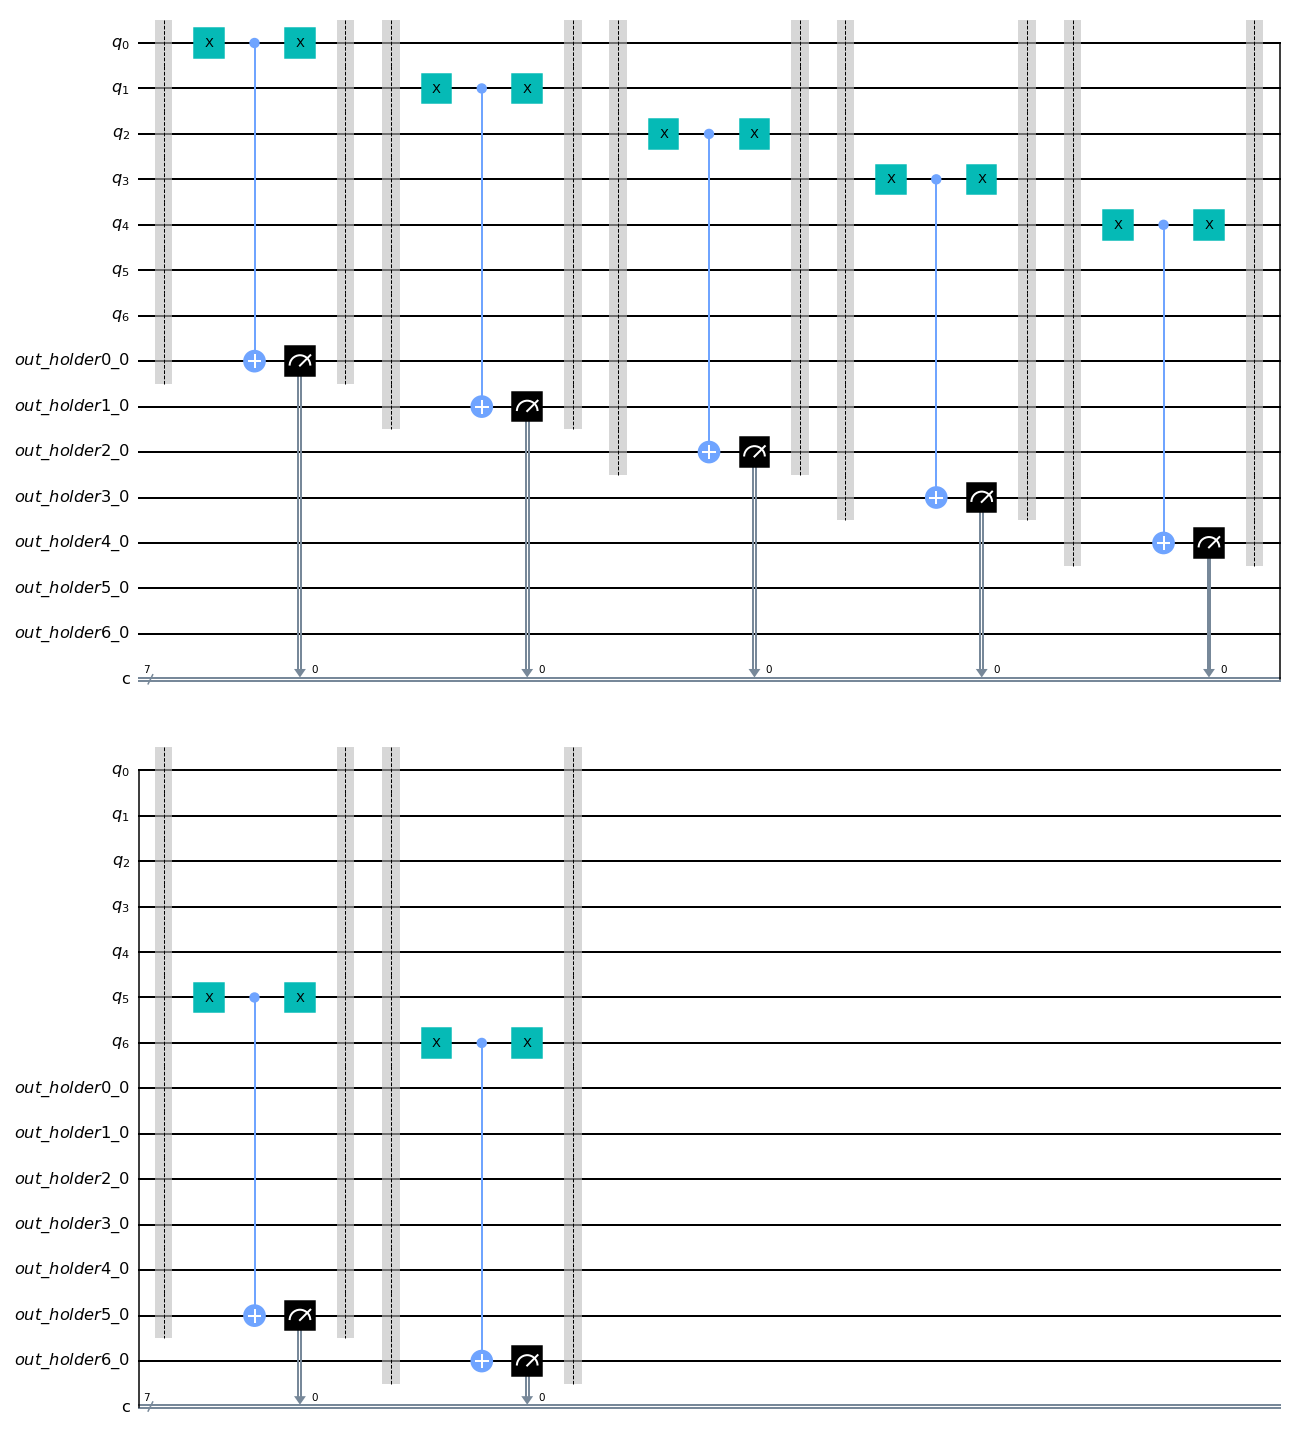

In [53]:
#recursive not calls

q2 = QuantumRegister(7,'q')
c2 = ClassicalRegister(7,'c')
qc2 = QuantumCircuit(q2,c2)
#let's apply a bunch of not gates recursively and see what happens!

for i in range(qc2.num_qubits):
    temp_out = QuantumRegister(1, 'out_holder' + str(i))
    not_qbit(qc2, q2[i], temp_out)
qc2.draw('mpl')

Recursive and gate calls

1
0 1
0 2
0 3
0 4
0 5
0 6
2
1 2
1 3
1 4
1 5
1 6
3
2 3
2 4
2 5
2 6
4
3 4
3 5
3 6
5
4 5
4 6
6
5 6
7


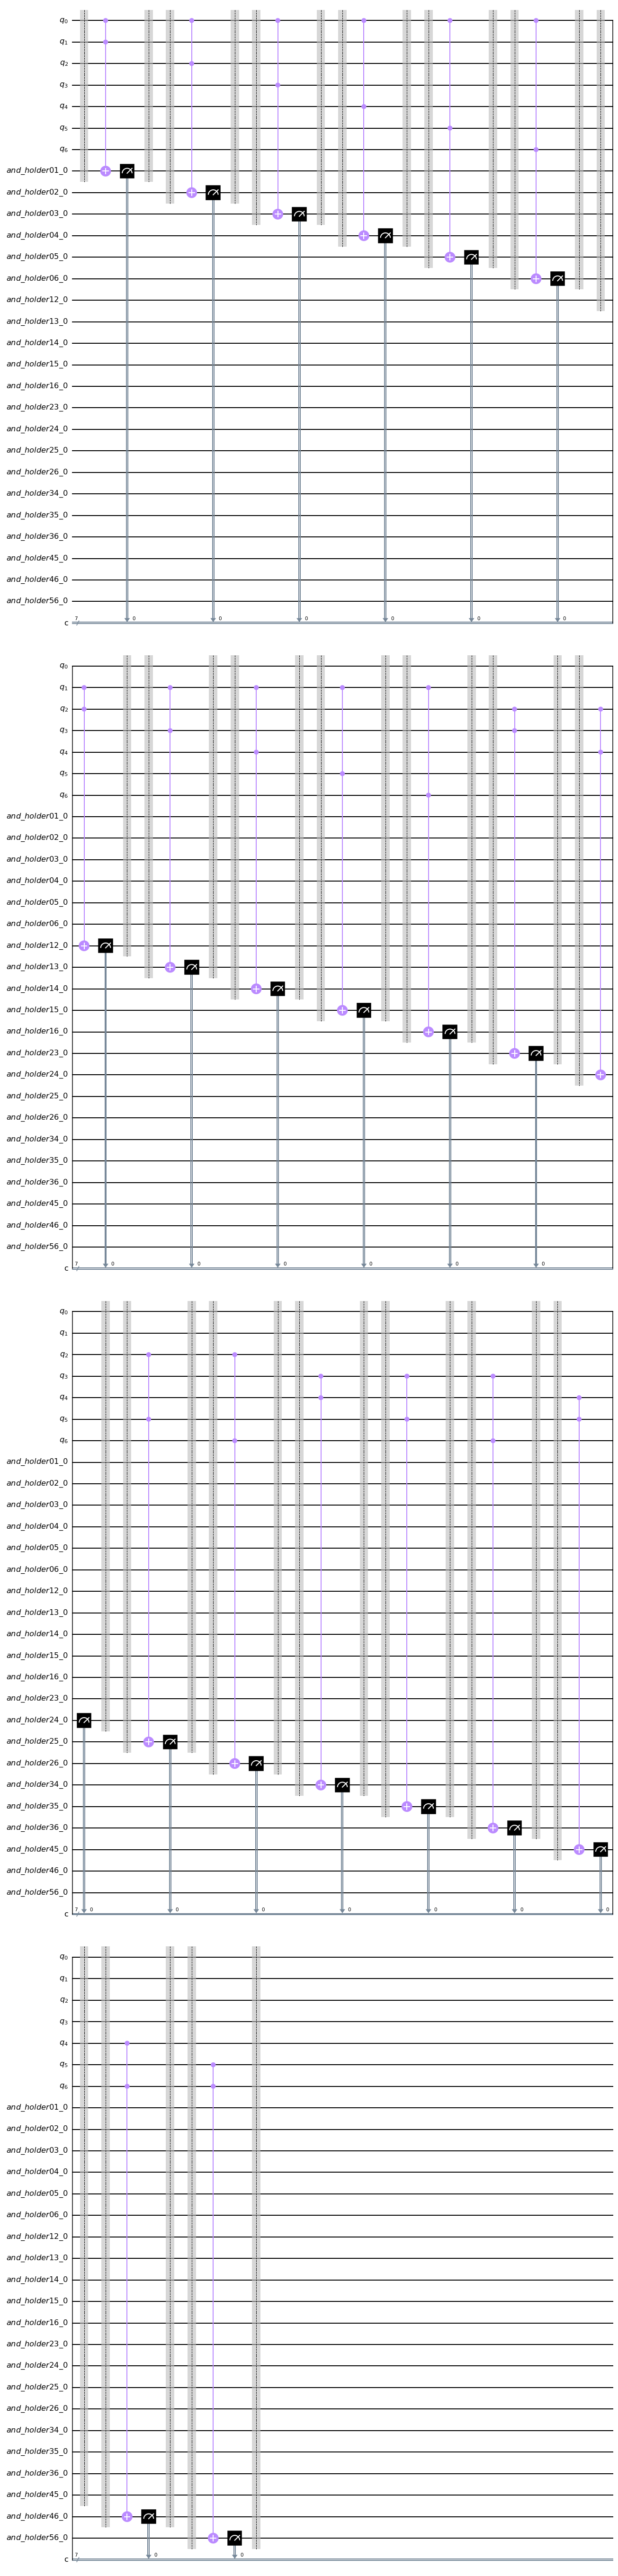

In [75]:
q3 = QuantumRegister(7,'q')
c3= ClassicalRegister(7,'c')
qc3 = QuantumCircuit(q3,c3)

len = qc3.num_qubits
for i in range(len):
    x = i+1
    print(x)
    for j in range(x, len):
        print(i, j)
        temp_out = QuantumRegister(1, 'and_holder' + str(i) +str(j))
        and_qbit(qc3, q3[i], q3[j], temp_out)
qc3.draw('mpl')